In [7]:


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix


y_test = np.load("../artifacts/y_test.npy")
y_proba = np.load("../artifacts/y_proba.npy")
y_pred =  np.load("../artifacts/y_pred_default.npy")
rows = []

for t in np.arange(0.1, 0.91, 0.05):
    y_pred = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = (2 * precision * recall / (precision + recall)) if precision + recall > 0 else 0

    rows.append([t, precision, recall, f1, fp, fn])

threshold_df = pd.DataFrame(
    rows,
    columns=["threshold", "precision", "recall", "f1", "false_positives", "false_negatives"]
)

threshold_df


,threshold,precision,recall,f1,false_positives,false_negatives
0,0.10,0.342251,0.991979,0.508916,713,3
1,0.15,0.370071,0.978610,0.537051,623,8
2,0.20,0.388466,0.954545,0.552204,562,17
3,0.25,0.411215,0.941176,0.572358,504,22
4,0.30,0.431056,0.927807,0.588634,458,27
5,0.35,0.445312,0.914439,0.598949,426,32
6,0.40,0.468208,0.866310,0.607880,368,50
7,0.45,0.489796,0.834225,0.617211,325,62
8,0.50,0.501718,0.780749,0.610879,290,82
9,0.55,0.522472,0.745989,0.614537,255,95


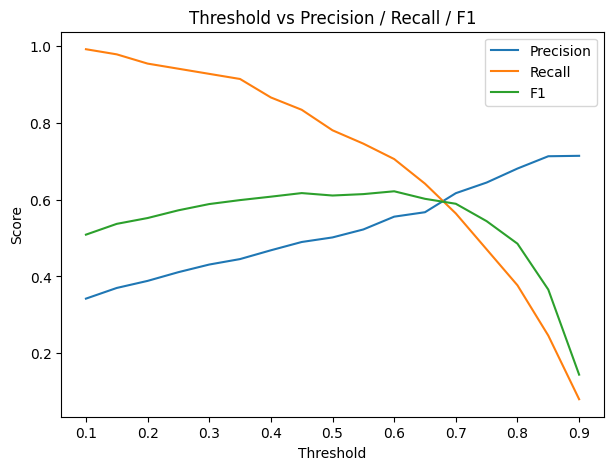

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(threshold_df["threshold"], threshold_df["precision"], label="Precision")
plt.plot(threshold_df["threshold"], threshold_df["recall"], label="Recall")
plt.plot(threshold_df["threshold"], threshold_df["f1"], label="F1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Precision / Recall / F1")
plt.legend()
plt.show()


Since business costs are unknown, we prioritize recall to avoid missing churners.
At a threshold of 0.35, the model captures ~91% of churners while maintaining
reasonable precision. This demonstrates how threshold selection significantly
affects outcomes without retraining the model.


In [9]:
selected_threshold = 0.35
y_pred_final = (y_proba >= selected_threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


[[609 426]
 [ 32 342]]
              precision    recall  f1-score   support

           0       0.95      0.59      0.73      1035
           1       0.45      0.91      0.60       374

    accuracy                           0.67      1409
   macro avg       0.70      0.75      0.66      1409
weighted avg       0.82      0.67      0.69      1409

